# Gender equality and prosperity: a visual data analytics report

Foreword:
For building this notebook, we have tried to work with and experiment with as many graphs and analyses as possible. We used several libraries as will be shown throughout the notebook, and tried to come up with interesting charts and plots. Sometimes this might have been at the cost of the level of the analysis and interpretation, but we put the focus on the coding because this taught us the most.

Most sincerely, Group 16

In [1]:
def contributors():
    print("This notebook is made by:\n\n Brennen Bouwmeester, 4446461\n Batoul Mesdaghi, 4495896 \n Kevin Su, 4438108")
contributors()

This notebook is made by:

 Brennen Bouwmeester, 4446461
 Batoul Mesdaghi, 4495896 
 Kevin Su, 4438108


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Libraries needed for scraping
from bs4 import BeautifulSoup
import io
from requests import get

#Load the pandas library needed for dataframes
import pandas as pd

#New packages installed geopandas and geoplot
import geopandas as gpd
import geoplot

#Import libraries needed for interactive plots
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

#New package plotly with api key
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

#Import stats to be able to do a regression analysis
from scipy import stats

In [3]:
#Here are the usernames and corresponding api_keys needed in order to work with plotly.
#If one of them is used too much for one day, activate the other.

#plotly.tools.set_credentials_file(username='Group16FreeBot1', api_key='TCK04WG6ttTdfOfoVJvr')
plotly.tools.set_credentials_file(username='Group16FreeBot2', api_key='1Q0V9J5z2qobNzSeBF3U')

# 1. Introduction

## 1.1 Sustainable Development Goal: Gender Equality
In September 2015, the 2030 UN agenda for Sustainable Development came into force. This agenda builds on the Millenium Development Goals (MDGs) and aims to enlarge global prosperity, while harmonizing environmental protection with different forms of economic growth and social inclusion (UN, 2018a). Compared to the MDGs, the environmental goals are further specified in the Sustainable Development Goals (SDGs). However, there are goals which have remained the same in both sets of global challenges, among which the fifth goal: the aspiration to secure gender equality.

This goal includes the empowerment of women and girls for the reduction of poverty, the promotion of health, education and the protection of the well-being of boys and girls. The security of gender equality is fundamental to maintain peaceful and prosperous societies. Within the MDGs, gender equality was much focussed on the equal access to education between boys and girls. According to critics, it therefore failed to "adequately conceptualise the nature of gender inequality or the diverse forms this takes", to develop adequate policies to put the goal into practice and to take measurements for the monitoring of this goal (Unterhalter, 2005). For example, 1 out of 5 women and girls between the age of 15 to 49 still experience forms of physical or sexual harrasement and 49 countries have no laws protection women from domestic violance (UN, 2018b).

What is important to note here, is that the distinct global challenges are not isolated from each other: existing literature has mentioned possible links between gender equality and other goals, namely between the educational attainment by women in a country (Unterhalter, 2005), long-run economic growth (Lagerhöf, 2003) and the reduction of poverty in developing countries (Morrison, Rajhu & Sinha, 2007). For policymakers, it is crucial to understand the undelying mechanisms between gender equality and other goals, so that not only adequate policies can be developed, but also more precise indicators can be selected to monitor the effectivity of policies.

## 1.2 Research Questions
The scientific contribution of this project is to gain more understanding of mechanisms of human prosperity, by analyzing the causal relations between gender equality and other SDGs. The societal contribution is to help policymakers in the achievement of gender equality with the information on these causal relations.

Therefore, the following research question has been formulated:

**How is gender equality related to the prosperity of a country?** 

In order to answer this research question, the following subquestions can be explored:

1. How is the Gender Inequality Index (GII) related to the Human Development Index (HDI)? 

2. What are differences in educational attainment between men and women in different countries?

3. What is the relation between educational attainment of women and their employment in different countries? 

4. How large is female participation in the labour market compared to male participation in different countries?

5. What trend exists in the unemployment ratio between women and men and the GDP of a country, controlled for population?

6. How does the trend of completed tertiary eduction of male and female develop over time?

The exact link between the main research question and these subquestions will become more clear in section 2.3. 

The subquestions were chosen to explore the research question in further detail. Firstly, the GII and the HDI will be used. The relation between these two indices will be shown to get an overview of an aggregated trend between gender equality and human development. If a trend is visible, more precise indicators will be selected from a suitable databank to assess the relation between gender equality in education and the labour market with the overall economy on a lower scale. This will among which be done with indicators on the educational attainment for men and women. Then, the third subquestion can explore the relationship between the completion of tertiary education and the employment ratio of women across different countries. This can be compared to the male participation, as formulated in the fourth subquestion. To find the link between the labour market participation and the overall economy of a country, indicators will be analysed to look at possible trends between the unemployment ratio of women compared to men and the GDP.  Lastly, we will look at the trend of completed tertiary education in the future. This gives an indication how gender equality will continue to develop.

## 1.3 Structure
Chapter 2 will elaborate on how the data is cleaned and processed after identifying the relevant indicators for educational attainment and the labour market. Chapter 3 will show the results from the analyzing techniques. Chapter 4 will include the conclusion of the project, discussion and recommendations for future researchers.

# 2. Methodology
This chapter provides an outline on how the data will be collected. The research methodology will be elaborated on in paragraph 2.1. Paragraph 2.2 explains what the data collection is based on and how it cleaned. Chapter 2.3 will discuss the relevant libraries and analyzing techniques used to explore the data for the research questions.

## 2.1 Research Methodology
In order to see the general, aggregated trend between gender equality and human development, the United Nationals Development Programme (Human Development Reports) is used to extract the GII and the HDI. To select more precise indicators for the relation between gender equal education, employment and the economy, it is necessary to understand how a 'gender equal' life has been defined for men and women. This will be done by looking at the articles of the Universal Declaration of Human Rights, where the quality of a good life has been defined by looking at various aspects in the life of individuals, regardless of their gender. The Universal Declaration was the first global affirmation of norms claiming universal authority and validity (Samnøy, 1993). This global framework has thus been chosen to select indicators on gender equality more carefully.

The aspects of a good human life, as defined through the articles of the Universal Declaration of Human Rights, make it possible to find and group relevant indicators within gender statistics. Each indicator can be related to the relevant article. These indicators will be extracted from the Gender Statistics Data Catalog of the World Bank. This comprehensive source contains data sex-disaggregated data data and gender statistics on demography, education, health, economic participation, public life and decision-making (World Bank, 2018). The databank contains 500 series on these topics and is thus composed of an extremely diverse range of indicators. Therefore, this databank has been chosen to select the relevant indicators.

After selection of the indicators and the data gathering, the data and its trends will be analysed through the Python programming language. Python has a easy-to-understand syntax and furthermore, the availability of data science libraries continues to grow (BSN Magazine, 2018). The libraries are particularly powerful for analyzing and visualizing large datafiles.

Out of the libraries, the Pandas library will be used to use the large datafile in a dataframe and to conduct operations. The Matplotlib library can then make 2D plots of dataframes containing the relevant indicators on gender equality in education, the labour market and the overall economy of a country. Matplotlib can also make the plots interactive so multiple years can easily be selected by policy makers. This allows one to see the development of different indicators over the years which have passed. For the relation between the GII and HDI, the Scipy library has been used to draw a regression line between datapoints in the scatter plot. Because it is also relevant to show the differences between countries, three new libraries have been installed and used in the Jupyter Notebook environment for Python: Geoplot, Geopandas and Plotly. 

Geoplot is a high-level Python geospatial plotting library compatible with Matplotlib. The library Geopandas is used to provide the input for the geographic visualizations (GeoPandas, 2018). Plotly has been installed for additional layout purposes of the graphs. For using Plotly an account was needed, which is added in the code where Plotly is used for the first time. Because there is a limited number of uses per day, two accounts were added in order for the notebook to work properly at all times.

From the trends and the relations between the GII and the HDI and between the more precise indicators, one can recommend suitable indicators to assess gender equality with.

## 2.2 Data collection and preparation
The general data collection and preparation will be discussed in this section.

### 2.2.1 United Nations Development Programme (Human Development Reports)
In order to get an aggregated view of the relation between gender equality and human development and well-being, the data from the Human Development Reports are directly scraped from the corresponding website. The HDI Trend (http://hdr.undp.org/en/composite/trends) table is scraped with the function below.

In [4]:
def scraper_hdi():
    """This function scrapes the Human development index from the united nations development programme website"""
    #To scrape a table from a website, we need to save the URL and use the get function to get the webpage as a webpage
    url = "http://hdr.undp.org/en/composite/trends"
    webpage = get(url)

    #Now the BS4 library converts the webpage into a "soup"
    html_soup = BeautifulSoup(webpage.text, "html.parser")
    table = html_soup.find_all("table")[0]

    #Create an empty list to put all of the rows of the table in
    l = []
    #For every row in the table...
    for tr in table.find_all("tr"):
        #Select all the values in that row
        td = tr.find_all("td")
        #The row is all of the values in that row combined
        row = [tr.text for tr in td]
        #This is added to the list that will be turned into a dataframe later on
        l.append(row)

    #Now that there is a list of all the rows in the table, turn it into a pandas dataframe.
    #Because the first 3 and the last 31 rows are not containing information that is needed, these are sliced off
    hdi = pd.DataFrame(l[4:198])   
    hdi = hdi.replace("..", np.nan)

    #Data cleaning: Because there are empty columns in the table these are deleted in a smart way (dropping the odd columns)
    for column in hdi:
        if column > 2 and column%2:
            hdi = hdi.drop([column], axis=1)

    #iloc selects only certain rows and columns, the last 6 columns are not interesting.
    hdi = hdi.iloc[:, 1:-6]

    #The column names are changed
    hdi.columns = ["country"] + list(hdi.iloc[0, 1:])

    #Again some dropping
    hdi = hdi.iloc[2:,:]
    return hdi

The Gender Inequality Index (http://hdr.undp.org/en/composite/GII) is also directly scraped with the function below. The tables from the website had to be modified slightly by dropping unnecessary columns and rows, filling NA values, and adding appropiate column names. Due to the nature of the tables, trend versus composition, the rows and columns dropped differentiate between each other. 

In [5]:
def scraper_gii():
    """This function scrapes the Gender inequality index from the united nations development programme website"""
    
    url = "http://hdr.undp.org/en/composite/GII"
    webpage = get(url)

    #Now the BS4 library converts the webpage into a "soup"
    html_soup = BeautifulSoup(webpage.text, "html.parser")
    table = html_soup.find_all("table")[0]

    #Create an empty list to put all of the rows of the table in
    l = []
    #For every row in the table...
    for tr in table.find_all("tr"):
        #Select all the values in that row
        td = tr.find_all("td")
        #The row is all of the values in that row combined
        row = [tr.text for tr in td]
        #This is added to the list that will be turned into a dataframe later on
        l.append(row)

    #Now that there is a list of all the rows in the table, turn it into a pandas dataframe, using the relevant columns
    gii = pd.DataFrame(l[3:231])   
    #Set the NaN values
    gii = gii.replace("..", np.nan).replace("", np.nan)
    #More slicing
    gii = gii.iloc[5:,1:3]
    gii.columns = ['country','GII']
    return gii

In [6]:
#Call the scrape functions
hdi = scraper_hdi()
gii = scraper_gii()

### 2.2.2 The World Bank Gender Statistics DataBank
After looking at the overal relation between the GII and the HDI, the Gender Statistics DataBank was used to find more precise indicators. This databank of the World Bank contains 534 series (indicators) over 263 countries or areas in the world for the past 50 years. All the data from this source was downloaded from the DataBank as a CSV file. First the indicators were assessed to match relevant indicators with their corresponding articles in the Universal Declaration of Human Rights (Appendix A). Many of the indicators which related to gender equality were not directly linked to education or the labour market. There were also indicators regarding female participation in the labour market which contained almost no values for any of the countries. These indicators were dropped and in the end 6 indicators were considered apart from the GII and HDI (Table 1).

| Data Indicator | Universal Declaration of Human Rights |
| --- | --- |
|Labor force, female and total (female and total workforce))|Article 23|
|Ratio of female to male youth unemployment rate (% ages 15-24)|Article 23|
|Educational attainment, at least completed primary, population 25+ years, female and male (%) (cumulative)|Article 26|
|Educational attainment, at least completed lower secondary, population 25+ years, female and male (%)|Article 26|
|Educational attainment, at least Bachelor's or equivalent, population 25+, female and male (%) (cumulative)|Article 26|
| Gender Inequality Index | Article 7, Article 21, Article 25, Article 26|
| Human Development Index | Article 3, Article 4, Article 26 |

Tabel 1: the chosen indicators for the data analysis. The left column shows the indicator and its corresponding unit in brackets. The right column shows the corresponding article in the Universal Declarations.

In [7]:
def csv_reader(list_of_countries, file_name):
    """This function turns a csv file into a dataframe and returns it"""
    
    #Read the csv file where the values are splitted using a ;
    #Be sure that the "Data Python Assignment2.csv" file is in the right place
    df = pd.read_csv(file_name, delimiter = ";",na_values = "..")

    #Only take the selcted countries and the whole world into account for a more compact dataset
    df = df[df["country code"].isin(list_of_countries)]

    #Because of deleting many of the rows, a new indexing is needed, the old one gets deleted as well
    df = df.reset_index().iloc[:,1:]
    return df

Before the indicators from the datafile were used for the data analysis, a function was made to read the datafile into a dataframe and select only a specific group of countries (presented in a so-called 'list') and an average from the world from the entire dataframe. After the selection, the indexing is fixed in the function as well.

In [8]:
#Create a list of countries that we are interested in
list_of_countries = ["AUS", "BRA", "USA", "IRN", "ITA", "TUR", "NLD", "ZAF", "SWE", "SGP", "PAK"]

Now that the list of countries has been established, the according data can be loaded from the csv file.

In [9]:
#Read the world data bank csv file using the countries we are interested in
df = csv_reader(list_of_countries, "Data Python Assignment2.csv")

For the selection of countries for the visualization, the data was analyzed on missing values for the selected indicators in Table 1. In the selection, the aim was to have a diverse range of countries from different continents. In the end, 11 countries were seleced to write the functions with (list below).

- Australia
- Brazil
- United States
- Iran
- Italy
- Turkey
- Netherlands
- South Africa
- Sweden
- Singapore
- Pakistan

In the datafile, the indicators can be found in two ways: either by searching for the full name of an indicator or by using the code of the indicator. In order to get both efficiently, two functions were made: the first function would make a dictionary of with all the question codes (keys) and their corresponding question (values). The second function would use the dictionary to find the corresponding full name when the code is presented as an input.

In [10]:
def question_dict_maker(df):
    """This function makes a dictionary with all the questions (columns) in a dataframe and the way that they are coded"""
    
    question_df = df[["question", "code"]]
    question_dict = {}
    for index, row in question_df.iterrows():
        question_dict[row[1]] = row[0]
    return question_dict   

In [11]:
question_dict = question_dict_maker(df)

In [12]:
def question_getter(question_code):
    """This function uses the created question dictionary and returns the full question when a code is given."""
    
    question = question_dict[question_code]
    return question

In [13]:
question_getter("SE.PRM.CUAT.MA.ZS")

'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)'

## 2.3 Data Analysis Techniques
This section will show the functions used for each of the research questions and how these functions were adjusted for the best result. The data analysis techniques are focused on data visualization in order to answer the questions. The order of the questions helps to gradually increase the understanding of the problem.

The following subquestions focus on narrower indicators of prosperity, specifically education and employment. These two areas were chosen as it shows the personal developments and their opportunities seperated by gender.

### 2.3.1 Relation between HDI and GII

The first explanatory analysis shows the values of the HDI and GII indices plotted on a world map. With a visual inspection it becomes clear which countries score high and low. To be able to show a world map, some helpfunctions are needed to link the data to a world map.

The shapefile of the world needs to be inputted in a dataframe and the countries from the world need to be linked to the GII and HDI values. The other function makes sure that the country code is available in the dataframes HDI and GII. 

In [14]:
def shape_world():
    """This function creates the world as a dataframe of different countries, their country code and population"""
    
    path = gpd.datasets.get_path('naturalearth_lowres')
    world = gpd.read_file(path)
    return world

In [15]:
world = shape_world()

In [16]:
def merge_countries_for_world_map(dataframe):
    """This function takes a dataframe of HDI or GII data and merges the country name with the country code.
   It also adjusts the way the country names are coded in the given dataframe to be able to merge it
   """
    
    #Create dataframe of country names and country codes
    countrycodes = pd.read_csv("country_code.csv", sep = ",", encoding = "utf-8")

    #Replace the () around some countries to fit in the format of countrycodes
    dataframe["country"] = dataframe["country"].str.replace(" (", ", ", regex = False).str.replace(")", "")
    
    #Merge them
    merged_df = dataframe.merge(countrycodes, on = "country", how = "left") 
    
    return merged_df

The two functions GII and HDI differ from each other due to the type of data scraped. HDI shows a trend over time while GII only has the last available year. For GII the function only shows a static image of the world with a layer of colour on it. Notice that the higher a country scores, the higher inequality it has thus performing worse. The function of HDI allows the parameters to become interactive, as you can change the year and show developments over time.  

In [19]:
def world_value_gii(dataframe_cc, world):
    """This function creates a geoplot using the scraped information from the gender inequality index database."""
    
    #Merge the GII dataframe with the given world dataframe and create a graph based on this combined information
    world_dataframe = world.merge(dataframe_cc, left_on = "iso_a3", right_on = "country code", how = "left")
    
    world_dataframe["GII"] = world_dataframe["GII"].astype("float")

    #Create a plot, nine different clusters and equal intervals, where missing values are coloured differently
    ax = world_dataframe.dropna().plot(column="GII", scheme='equal_interval', figsize=(16, 8), k=9, legend=True)
    world_dataframe[world_dataframe.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='...')
    

In [20]:
def world_value_hdi(dataframe_cc, world, column):
    """This function creates a geoplot using the scraped information from the human development index database."""
    
    #Merge world database with HDI database
    world_dataframe = world.merge(dataframe_cc, left_on = "iso_a3", right_on = "country code", how = "left" )

    #Values need to change to float type and missing values become 0
    world_dataframe.loc[:,"1990":"2017"] = world_dataframe.loc[:,"1990":"2017"].astype("float")
    
    #Create a plot, nine different clusters and equal intervals, where missing values are coloured differently
    ax = world_dataframe.dropna().plot(column=column, scheme='equal_interval', figsize=(16, 8), k=9, legend=True)
    world_dataframe[world_dataframe.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='...')

To find the relation between gender equality and the prosperity of any country, the existing GII will be plotted against the HDI. Both datasets which were scraped were converted to dataframes with their own functions. The functions also converted all the datavalues to floats and dropped the missing values. Then a function is used to merge the dataframes and draw a regression line between the datapoints in a scatterplot. The HDI is the independent variable while GII is the dependent. 

In [21]:
def hdi_and_gii_correlation(hdi, gii):
    """This function creates a plotly graph that shows both a scatter plot between the HDI and the GII
    as a regression line with corresponding statisctical values so a conclusion can be made
    """
    #Merge hdi and gii dataframes on country and drop missing values
    hdi_and_gii = hdi.merge(gii, on = "country", how = "inner")
    hdi_and_gii = hdi_and_gii[["country", "2017", "GII"]].dropna()
    
    #Set up values from dataframe 
    hdi_x = hdi_and_gii["2017"].astype("float")
    gii_y = hdi_and_gii["GII"].astype("float")
    
    #Fill in the regression values using scipy
    slope, intercept, r_value, p_value, std_err = stats.linregress(hdi_x, gii_y)
    #Create the line (which becomes our y values)
    line = slope*hdi_x+intercept                                
        
    print("The R2 value is: %.3f. \n The p value is: %.3f. \n The SE is: %.3f." 
          % (r_value, p_value, std_err))
    
    #Create the scatter chart
    datapoints = go.Scatter(
        x = hdi_x,
        y = gii_y,
        mode = 'markers',
        text = hdi_and_gii["country"],
        name = "Data"
    )
    
    #Create the fitted line
    fitline = go.Scatter(
        x = hdi_x,
        y = line,
        name = "Linear fit"
    )
    
    #Add text to the graph like title, xlabel, and ylabel. 
    layout = go.Layout(
        title = "HDI and GII correlated with a linear fit",
        xaxis = dict(
            title = "HDI"),
        yaxis = dict(
            title = "GII"),
    )

    #Add them together and return them
    data = [datapoints, fitline]
    fig = go.Figure(data=data, layout=layout)
    
    
    return(py.iplot(fig, filename='hdi-and-gii'))

An additional zoomed function has also been used to find the top and bottom X countries in both the GII and the HDI in 2017. This gives the reader a faster understanding which countries are on the extreme end. 

In [22]:
def top_x_gii_countries(x, asc=True):
    """This function takes an integer and returns the best x scoring countries on the Gender inequality index.
    When a second argument False is given, the lowest x countries are returned.
    """
    
    top_x_countries = gii.dropna().sort_values(by = "GII", ascending = asc)[:x].reset_index(drop=True)
    return top_x_countries

In [23]:
def top_x_hdi_countries(x, asc=False):
    """This function takes an integer and returns the best x scoring countries on the Human Development Index.
    When a second argument True is given, the lowest x countries are returned.
    """
    
    top_x_countries = hdi.dropna().sort_values(by = "2017", ascending = asc)[:x].reset_index(drop=True)
    return top_x_countries[["country", "2017"]]

### 2.3.2 Differing educational attainment
To find out the level of education of both genders in different countries, the following indicators of Table 1 were used: primary, lower secondary and tertiary educational attainment by men and women. To find a trend in the percentage of educated citizens, a view will be given that distinguishes men from women using different colors. By using an interactive function, the year can be adjusted. A warning is that the missing data is not filled with other data because there was too much missing data to fill. Interpolation would give inaccurate results, therefore the bar chart might miss some values. A helpfunction called country_df_maker is seperated due to its use in multiple functions. It changes the index of the countries. 

In [24]:
def country_df_maker(df):
    """This function creates a dataframe of only the unique countries in a given dataframe.
    It changes the index into the countries which comes in handy when creating graphs
    """
    
    countries = pd.DataFrame(df['country name'].unique())
    countries.rename(columns={0: 'Country'}, inplace=True)
    countries_complete = countries.set_index('Country')
    return countries_complete

In [25]:
def education_levels(year, df):
    """This functon creates multiple horizontal bar plots 
    that indicate the education levels of different countries in a chosen year.
    The function uses the accumulate deducation of a person, 
    so that the primary education is always higher than the secondary and so on.
    """
    
    #The dataframes for both genders and all education levels are retrieved.
    pri_ed_female = df[(df['code'] == 'SE.PRM.CUAT.FE.ZS')]
    pri_ed_male = df[(df['code'] == 'SE.PRM.CUAT.MA.ZS')]
    sec_ed_female = df[(df['code'] == 'SE.SEC.CUAT.UP.FE.ZS')]
    sec_ed_male = df[(df['code'] == 'SE.SEC.CUAT.UP.MA.ZS')]
    ter_degree_female = df[(df['code'] == 'SE.TER.HIAT.BA.FE.ZS')]
    ter_degree_male = df[(df['code'] == 'SE.TER.HIAT.BA.MA.ZS')]
    
    #The countries are added to the dataframes.
    countries_local = country_df_maker(df)
    countries_local['Male Primary Education'] = pri_ed_male[year].values
    countries_local['Female Primary Education'] = pri_ed_female[year].values
    countries_local['Male Secondary Education'] = sec_ed_male[year].values
    countries_local['Female Secondary Education'] = sec_ed_female[year].values
    countries_local['Male graduates'] = ter_degree_male[year].values
    countries_local['Female graduates'] = ter_degree_female[year].values
    countries_local.plot.barh(figsize=(20,20), 
                              color = ["lightblue","lavenderblush","deepskyblue","pink","mediumblue", "palevioletred"])
    plt.title('Educational attainment, completed Bachelors or equivalent, population 25+ years (%)')

Furthermore, the completed tertiary education metric will be used specifically in other analysis. A seperate bar chart of this is made, this gives a simpler and easier overview of the relevant data.

In [26]:
def educational_attainment(year, df):
    """This function creates a plot of the percentage of graduate males and females in a given year, 
    using chosen countries in a dataframe.
    """
    
    #Some years are removed due to many missing values
    education_df = df.iloc[:, 1:-3]
    
    #Find the data for both genders and interpolate the missing data using the data that is not missing.
    ter_degree_female = education_df[(education_df['code'] == 'SE.TER.HIAT.BA.FE.ZS')]
    ter_degree_female = ter_degree_female.iloc[:,3:].interpolate(method="linear", axis=1)
    ter_degree_male = education_df[(education_df['code'] == 'SE.TER.HIAT.BA.MA.ZS')]
    ter_degree_male = ter_degree_male.iloc[:, 3:].interpolate(method="linear", axis=1)
    
    #Use the country_df_maker to create a dataframe with the unique countries in the dataframe
    countries_local = country_df_maker(df)
    #Make new columns with the number of graduates of both genders
    countries_local['Male graduates'] = ter_degree_male[year].values
    countries_local['Female graduates'] = ter_degree_female[year].values
    #Plot the number of graduates of both genders for all the different countries.
    countries_local.plot.barh(figsize=(20,10), color = ["lightblue","lightpink"])
    plt.title("Educational attainment, completed Bachelor's or equivalent, population 25+ years (%)")

### 2.3.3 Linking education to employment
Where the answer to subquestion 2 shows the difference in education between men and women, and a level of education in different countries, the answer to subquestion 3 will show a relation between tertiary education and the employment ratio of women in different countries. The helpfunction creates a dataframe with only one indicator, in order to merge them later on so analysis will be more convenient. It fills the missing data by linear interpolation as there is enough data available. 

In [27]:
def get_edu_ind(ind):
    """This function takes a question code and returns a dataframe that only consists of this question code.
    It also interpolates the missing data and should only be used with questions about education, 
    because the data preparation is based on these questions
    """
    
    #Make a dataframe only containing the needed questions
    education_df = df[df["code"] == ind]
    #Some years are removed due to many missing values, 
    #the deleted years have missing values specifically in the education subject
    education_df = education_df.iloc[:, 1:-3]
    
    #Interpolation takes place to deal with remaining missing values
    education_df.iloc[:, 3:] = education_df.iloc[:, 3:].interpolate(method="linear", axis=1)
    
    return education_df

The figure will show two graphs side by side with the independent variable on the Y-axis, namely the countries. The dependent variables are completed tertiary education placed next to the ratio of female and male employment. This technique is used because the visualization intuitively shows if the two variables are correlated with each other. 

In [28]:
def education_and_employment(year):
    """This function creates a duoplot given a year. The selected countries are ordered by the percentage of graduate women.
    In this order these percentages are shown on the left side of the plot, while the employment ratio is shown on the right
    This way the duoplot shows a link between the education and the employment
    """
    
    #To make the graph interactive, we need variables dependent on the year input
    year_code_x = year + "_x"
    year_code_y = year + "_y"
    
    #Using the eductation dataframe maker, we get the needed columns as a dataframe
    employment_df = get_edu_ind("SL.EMP.TOTL.SP.FE.ZS")
    tertiary_df = get_edu_ind("SE.TER.HIAT.BA.FE.ZS")
    
    #To be able to sort the data by year, we turn the year into a float type
    tertiary_df[year] = tertiary_df[year].astype("float")
    tertiary_df = tertiary_df.sort_values(by = year)
    
    #Here we merge the education and employment dataframes of the country name, using the created year variables 
    tert_and_emp_df = tertiary_df.merge(employment_df, how = "inner", on = "country name")
    [["country name", year_code_x, year_code_y]]
    
    #Set up the values from the dataframe
    y_tert = tert_and_emp_df[year_code_x].tolist()
    y_emp = tert_and_emp_df[year_code_y].tolist()

    x_tert = tert_and_emp_df["country name"].tolist()
    x_emp = tert_and_emp_df["country name"].tolist()

    #Make bar graph and input parameters
    bar_graph = go.Bar(
        #Input data
        x = y_tert,
        y = x_tert,
        #Colors of the bars and their borders
        marker = dict(color='rgb(102, 153, 204)', line=dict(color='rgb(0, 0, 0)',
                width=1),
        ),
        #Name used in the legend
        name = 'Completed tertiary education, percentage women',
        #Horizaontal orientation
        orientation = 'h',
    )

    #Make scatter graph and input parameters
    scatter_graph = go.Scatter(
        #Input data
        x = y_emp,
        y = x_emp,
        #Only dots are shown, without a line
        mode = 'markers',
        #Color of the dots
        line = dict(
            color = 'rgb(255, 0, 0)'),
        #Name used in the legend
        name = 'Employment ratio, percentage male and female',
    )

    #Overall layout, design, and placement graphs
    layout = dict(
        #Title of the graoh
        title='Tertiary education & employment ratio',
        #Y-axis of barplot
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
            domain=[0, 0.85],
        ),
        #Y-axis of the scatterplot
        yaxis2=dict(
            showgrid=False,
            showline=True,
            showticklabels=False,
            #The color of the line that seperates the two graphs
            linecolor='rgba(102, 102, 102, 0.8)',
            linewidth=2,
            domain=[0, 0.85],
        ),
        xaxis=dict(
            title = "Completed tertiary education in %",
            zeroline=False,
            showline=False,
            showticklabels=True,
            showgrid=True,
            domain=[0, 0.42],
        ),
        xaxis2=dict(
            title = "Employment ratio male and female in %",
            zeroline=False,
            showline=False,
            showticklabels=True,
            showgrid=True,
            domain=[0.47, 1],
            side='top',
            dtick=10,
        ),
        legend=dict(
            x=0.029,
            y=1.038,
            font=dict(
                size=10,
            ),
        ),
        margin=dict(
            l=100,
            r=20,
            t=70,
            b=70,
        ),
        paper_bgcolor='rgb(248, 248, 255)',
        plot_bgcolor='rgb(248, 248, 255)',
        )
    
    #Make an empty list used to store labels/annotations in later
    annotations = []
    
    #Amount of values 
    y_s = np.round(y_tert, decimals=2)
    y_nw = np.round(y_emp, decimals=2)

    # Adding labels
    for ydn, yd, xd in zip(y_nw, y_s, x_tert):
        #labeling the scatter
        annotations.append(dict(xref='x2', yref='y2',
                                y=xd, x=ydn + 3,
                                text='{:,}'.format(ydn) + "%",
                                font=dict(family='Arial', size=12,
                                          color='rgb(255, 0, 0)'),
                                showarrow=False))
        #labeling the bar
        annotations.append(dict(xref='x1', yref='y1',
                                y=xd, x=yd + 3,
                                text=str(yd) + '%',
                                font=dict(family='Arial', size=10,
                                          color='rgb(102, 153, 204)'),
                                showarrow=False))

    layout['annotations'] = annotations

    #Creating two subplots
    fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                              shared_yaxes=False, vertical_spacing=0.001)

    fig.append_trace(bar_graph, 1, 1)
    fig.append_trace(scatter_graph, 1, 2)

    fig['layout'].update(layout)
    return(py.iplot(fig, filename='tertiary_education_and_employment_ratio'))

### 2.3.4 The role of women in the labour market

To further examine the role that women play in the world of education and labour, the part of the labour market that is occupied by women will be shown in the answer to subquestion 4. A series of pie charts will show the distribution of men and women in the labour market in different countries for different selectable years.

The second part of the function down below will show these distributions in a stacked bar plot, where the differences in population can also be seen. The combination of these plots show the footprint of women in the world's labour market.

It gives a simple overview of gender equality in the workforce by country and it is possible to look at trends through the years.

In [29]:
def labour_force(year, df):
    """This function creates multiple pie charts and a stacked barplot
    considering the way that labour force is divided over the genders in different countries. 
    It also shows the differences between countries in the bar plot
    """
    
    #Select the needed questions and cut out some of the columns to only keep the ones needed to create a graph.
    labour_force_female = df[(df['code'] == 'SL.TLF.TOTL.FE.IN')]
    labour_force_female = labour_force_female.iloc[:,2:]
    labour_force_female = labour_force_female.drop(['country code'], axis = 1)
    
    #Also rename the columns in order to get a good name for the x-axis
    labour_force_female.rename(columns={'country name': 'Country'}, inplace=True)
    labour_force_female = labour_force_female.set_index('Country')
    
    #Do the same thing for the total labour force
    labour_force_total = df[(df['code'] == 'SL.TLF.TOTL.IN')]
    labour_force_total = labour_force_total.iloc[:,2:]
    labour_force_total = labour_force_total.drop(['country code'], axis = 1) 
    labour_force_total.rename(columns={'country name': 'Country'}, inplace=True)
    labour_force_total = labour_force_total.set_index('Country')
    
    #Now that both the total labour force and the female labour force are calculated, 
    #the male labour force can be calculated as well
    labour_force_male = labour_force_total.subtract(labour_force_female, axis = 1)
    
    #Now combine the country names with the data to create the wanted graphs.
    countries_local = country_df_maker(df)
    countries_local['Male Workforce'] = labour_force_male[year].values
    countries_local['Female Workforce'] = labour_force_female[year].values
    countries_local.T.plot.pie(subplots=True, figsize=(40, 5),legend = False, colors = ['lightblue','palevioletred'])
    countries_local.plot(kind = 'bar', stacked = True, color = ['lightblue','palevioletred'])
    plt.title('Labour Force (Male and Female)')

### 2.3.5 The influence of the unemployment ratio women/man on the GDP of a country

In order to further elaborate on the impact of gender inequality on the prosperity of a country, the relation between inequality and GDP will be presented using the function down below. In this case inequality will be represented by the ratio between unemployed men and unemployed women, which shows the relative number of women that is active in the labour market. The relation between these two variables will be shown using a scatterplot . The size of the points (countries) in this plot are dependent on the population of a country, so the function will contain  more information than the two mentioned features.

This visual presentation picks a specific part of the labor force, namely unemployment. Unemployment helps 

In [30]:
def employment_and_gdp(year, df):
    """This function creates a scatter plot considering the employment in different countries for a chosen year.
    THe x-axis is about the number of females that are unemployed per male, 
    to indicate the difference in working between the genders.
    The y-axis shows the GDP that a country generates in a chosen year.
    The size of the dots is an extra feature that indicate the population of the country
    """
    
    #Because the function will be used as an interactive one, some year variables are needed. 
    year_code_x = year + "_x"
    year_code_y = year + "_y"
    #Create a dataframe with only the GDP per capita
    df_gdp = df[df['code'] == "NY.GDP.PCAP.CD"]
    #And one of the data in the chosen year
    df_gdp_year = df_gdp[['country name',year]]
    
    #Also create a dataframe of the population of the different countries
    df_pop = df[df['code'] == "SP.POP.TOTL"]
    df_pop_year = df_pop[['country name',year]]
    
    #Create a combined dataframe to be able to generate the wanted graph
    df_gdp_pop = df_pop_year.merge(df_gdp_year, on = "country name", how = "inner")

    df_fm_ratio = df[df['code'] == "SL.UEM.1524.FM.ZS"]
    df_fm_ratio_year = df_fm_ratio[['country name',year]]
    
    #Also merge the dataframe with the third variable
    df_gdp_equality = df_gdp_pop.merge(df_fm_ratio_year, on = "country name", how = "inner")
    df_gdp_equality.rename(columns={year_code_x: 'Population', year_code_y:'GDP per capita [in USD]',
                                    year:'Female to male youth unemployment rate'}, inplace=True)
    df_gdp_equality = df_gdp_equality.set_index('country name')
    #The variables of this plot are based on trial and error to include all the chosen countries 
    #but not show too much clean space.
    df_gdp_equality.plot.scatter('Female to male youth unemployment rate','GDP per capita [in USD]',
                                 s=df_gdp_equality.Population/100000,figsize=(20,10),xlim=(60,250),ylim=(0, 70000),alpha=0.5)
    plt.grid(True)
    
    #To make clear what dot belongs to which country, 
    #the names of the countries are added using the values of the country to get it in the right spot.
    for index, row in df_gdp_equality.iterrows():
        plt.text(row[2],  row[1], index)

### 2.3.6 Trend of education for men and women

By answering the last subquestion, trends in the education rate of both men and women will appear, possibly showing a point where women overtake men. The real values will be shown, as well as the function of the created prediction. Using numpy, a prediction is made based on the built-in polyfit function. An interactive polynomial leaves room for finding te optimal fit in order to predict the trend in the best way possible.

In [31]:
def education_predictor(country_code, male_education, female_education, polynom=1):
    """This function creates four linegraphs that show the development of education in different countries.
    Both genders are represented as well as a predicting mathematic function.
    This shows trends in the education rate as well as differences between the genders.
    """
    
    #A list of countries used to check the row index by. 
    countries = male_education['country code'].unique().tolist()
    country_row = countries.index(country_code)

    #Set up values from the dataframe depending on the country
    male_x = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    male_y = male_education.iloc[country_row, 3:10]
    
    female_x = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    female_y = female_education.iloc[country_row, 3:10]
    
    #Use a polyfit to predict
    male_z = np.polyfit(male_x, male_y, polynom)
    male_f = np.poly1d(male_z)
    
    female_z = np.polyfit(female_x, female_y, polynom)
    female_f = np.poly1d(female_z)
    
    #Plot the predicted values 
    male_x_new = np.linspace(2008, 2018, 10)
    male_y_new = male_f(male_x_new)

    female_x_new = np.linspace(2008, 2018, 10)
    female_y_new = female_f(female_x_new)


    #Make the graph with the four lines showing the completed and predicted lines of both female and male
    male_data = go.Scatter(
        x = male_x,
        y = male_y,
        name = "Male completed tertiary education %"
    )

    male_new_data = go.Scatter(
        x = male_x_new,
        y = male_y_new,
        name = "Male predicted completed tertiary education %"
    )

    female_data = go.Scatter(
        x = female_x,
        y = female_y,
        name = "Female completed tertiary education %"
    )

    female_new_data = go.Scatter(
        x = female_x_new,
        y = female_y_new,
        name = "Female predicted completed tertiary education %"
    )
    
    #Change the layout so that the legend is shown horizontally 
    layout = go.Layout(
        title = "Predicted trend tertiary education",
        legend=dict(orientation="h"),
        yaxis = dict(
            title = "Completed tertiary education in %")
    )
    
    data = [male_data, male_new_data, female_data, female_new_data]
    fig = go.Figure(data=data, layout=layout)

    return(py.iplot(fig, filename='predicted-tertiary-education'))

# 3. Results

## 3.1 Relation between HDI and GII

C:\Users\newbi\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning:

PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about



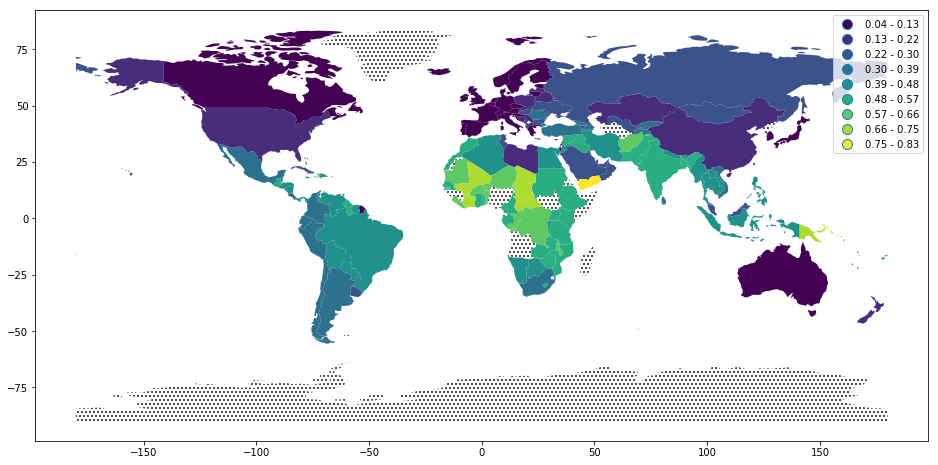

In [32]:
gii_cc = merge_countries_for_world_map(gii)
world_value_gii(gii_cc, world)

The graph above shows all the countries in the world and filled with their corresponding colour. The first thing that jumps out is the many missing values in Africa. Maybe these countries did not want to give up on this data, or they had hard times generating the data. Also it seems that a clear order can be made out of the different continents. Europe is the most gender equal, followd by North-America, South-America, Asia and Africa.

Another interesting feature of the way that these GII values have been calculated (hdr, 2018) is the bias towards women being on the downside of the inequality of genders in the world. Although this is mostly the case with inequality, it is not proper to assume that only women can be threated in a lesser way. It is also interesting to look at the compartments of the GII, which are health, empowerment and labour market. It could be interesting to find out if the value of these parts for all citizens are related to the GII, which would explain the order of the continents.

A last finding is that None of the countries are exactly gender equal, which is in line with other research (Kleven et al., 2018; Dhar et al., 2018).

The findings in this graph have lead to the selection of countries made in the rest of the analyses and are selected due to their differing GII values. Although this country selection is easily changable, the results of this research are based on the selection made earlier in this notebook, which is the result of this graph.

In [33]:
hdi_cc = merge_countries_for_world_map(hdi)
interact(world_value_hdi, dataframe_cc = fixed(hdi_cc),
         world = fixed(world), column = ["1990", "2000", "2010", "2012", "2014", "2015", "2016", "2017"])

interactive(children=(Dropdown(description='column', options=('1990', '2000', '2010', '2012', '2014', '2015', …

<function __main__.world_value_hdi(dataframe_cc, world, column)>

The interactive Human Developments Index (HDI) has the following components used to calculate the index: life expectancy at brith, expected years of schooling, years of schooling, and gross national income per capita. As shown it includes areas like health, education, and standard of living. The index is mostly used to show opportunities in personal development, however does not include factors like inequality (Human Development Index (HDI) | Human Development Reports, 2018). The HDI is used for this analysis to incorporate the broad sense of prosperity. 

The graph shows that majority of the world has slowly increased the HDI, as the top of the countries are near the values 0.98-0.95 while in 1990 it was still 0.71 - 0.87. The danger in interpreting this graph is also the changing legend which makes comparisons visually hard to see, however relative differences are more apparent. It is clear that Russia does not grow in HDI as much as other countries. 

Human Development Index (HDI) | Human Development Reports. (2018). Hdr.undp.org. Retrieved 2 November 2018, from http://hdr.undp.org/en/content/human-development-index-hdi

In [34]:
hdi_and_gii_correlation(hdi, gii)

The R2 value is: -0.910. 
 The p value is: 0.000. 
 The SE is: 0.041.


The correlated HDI and GII graph shows that there is a clear linear line between gender inequality and human development index, which is also plotted. By moving over the dots it shows the country name as well. The regression slope is negative as a GII of 0 is specified to be as equal. In simple words, how equal a country is how higher the HDI is. 

The p-value of the regression line shows that it is under 0.05 which shows significant linearity. The formula is y = 1.17 - 1.14 * x for x inbetween 0 and 1. For further interpretation the assumptions of regression analysis needs to be met, this is outside the scope of this research. 

In [35]:
top_x_gii_countries(10)

,country,GII
0,Switzerland,0.039
1,Denmark,0.040
2,Netherlands,0.044
3,Sweden,0.044
4,Norway,0.048
5,Belgium,0.048
6,Slovenia,0.054
7,Finland,0.058
8,Iceland,0.062
9,"Korea, Republic of",0.063


In [36]:
top_x_gii_countries(10, False)

,country,GII
0,Yemen,0.834
1,Papua New Guinea,0.741
2,Chad,0.708
3,Mali,0.678
4,Central African Republic,0.673
5,Côte d'Ivoire,0.663
6,Liberia,0.656
7,Afghanistan,0.653
8,"Congo, Democratic Republic of the",0.652
9,Niger,0.649


In [37]:
top_x_hdi_countries(10)

,country,2017
0,Norway,0.953
1,Switzerland,0.944
2,Australia,0.939
3,Ireland,0.938
4,Germany,0.936
5,Iceland,0.935
6,"Hong Kong, China, SAR",0.933
7,Sweden,0.933
8,Singapore,0.932
9,Netherlands,0.931


In [38]:
top_x_hdi_countries(10, True)

,country,2017
0,Niger,0.354
1,Central African Republic,0.367
2,Burundi,0.417
3,Sierra Leone,0.419
4,Mali,0.427
5,Mozambique,0.437
6,Yemen,0.452
7,"Congo, Democratic Republic of the",0.457
8,Guinea,0.459
9,Gambia,0.460


The tables above are inaccordance with the findings in Gender Inequality Index plot. The top countries in gender equality are from europe and the bottom countries are mostly from Africa.
Also the findings of the Human Development Index are the same as with the HDI graph. Thirdly most of the top countries in the GII list are also in the top of the HDI list, which is in accordance with the correlation that was found earlier.

## 3.2 Differing educational attainment

In [39]:
interact(education_levels,
         year = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"], df = fixed(df))

interactive(children=(Dropdown(description='year', options=('2008', '2009', '2010', '2011', '2012', '2013', '2…

<function __main__.education_levels(year, df)>

In [40]:
interact(educational_attainment, 
         year = ["2008", "2009", "2010", "2011", "2012", "2013", "2014"], df = fixed(df))

interactive(children=(Dropdown(description='year', options=('2008', '2009', '2010', '2011', '2012', '2013', '2…

<function __main__.educational_attainment(year, df)>

The function educational_attainment shows the percentage of men and women of the population above 25 years old who have completed a Bachelor's degree or equivalent. There are substantial differences between the countries. In the United States, Turkey, South Africa, Sweden and Netherlands, the percentage of female students dropped, while the percentage of female graduates increased in Brazil, Italy, Iran, Pakistan and Singapore. The rise of female students has thus led to a smaller gap between male and female graduates in higher education.

The same effect can be seen when looking at primary and secondary educational attainment. The number of girls who complete their primary or secondary education rises. Sometimes this percentage remains close to 100 percent due to the laws which state that primary education is mandatory for example.

The rise of female graduates can be related to different factors according to the OECD. First of all, women are able to combine studies and work with their family in many places. Secondly, a better preparation for girls for higher education is present, also from their increasing average tests scores. Other explanations are related to the feminisation of the teaching profession and a learning environment more conductive to girls' social and cognitive dispositions (Lancrin, 2014).

## 3.3 Linking education to employment

In [41]:
interact(education_and_employment,
         year = ["2008", "2009", "2010", "2011", "2012", "2013", "2014"])

interactive(children=(Dropdown(description='year', options=('2008', '2009', '2010', '2011', '2012', '2013', '2…

<function __main__.education_and_employment(year)>

The function education_and_employment shows the share of women and men in the workforce for each country. The distribution of men and women employees has changed little over the past couple of years, despite the higher educational attainment by women. Despite better results in primary and secondary education, many women still face different barriers when they want to enter the labour market. These barriers are often related to stereotypes and biases employers and other members in society have. People often have the impression that women have more family responsibilities. In other cases, particular beliefs restrictions women to enter a certain field or study. One example is in STEM-fields (Science, Technology, Engineering and Mathematics), regarding which existing literature says that women will be under underrepresented in fields where  brilliance and inherent ability are considered to be the key to success. In these fiels, the belief is that women often lack the same sort of innate intelligence as men, and thus there will be less women participating in these fields (Meyer, Cimpian & Leslie, 2015).

## 3.4 The role of women in the labour market

In [42]:
interact(labour_force,
         year = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], df = fixed(df))

interactive(children=(Dropdown(description='year', options=('2008', '2009', '2010', '2011', '2012', '2013', '2…

<function __main__.labour_force(year, df)>

At first sight the pie charts show an overwhelming majority for men in the labour market, which doesn't come as a surprise considering the research and data(Stypińska et al., 2018). This inequality on the labour market is part of the reason for inequality in the GII plot and tables in section 3.1. Also the African countries, which are generally more gender inequal have a larger majority of men than the European countries, so this is also in line with earlier foundings. To come to real conclusions a statistical analysis is needed, which is subject for further research.

## 3.5 The influence of the unemployment ratio women/man on the GDP of a country

In [43]:
interact(employment_and_gdp,
         year = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], df = fixed(df))

interactive(children=(Dropdown(description='year', options=('2008', '2009', '2010', '2011', '2012', '2013', '2…

<function __main__.employment_and_gdp(year, df)>

This bubble chart has three indicators which are represented, namely the GDP per capita, female to male youth unemployment rate, and population where you are able to choose the year. Female to male youth unemployment would signal if it was 1 there would be no difference between the two genders, if it is lower than 1 the female unemployment is lower than the male and vice versa. The benefits of the selective countries is a clear overview of what changed per country. Signapore for example made significant GDP growth per capita while lowering female to male youth unemployment.

The bubble chart also shows that countries where female unemployment is lower than male unemployment the GDP per capita is higher. There is a clear divide between two islands of countries with relative high female unemployment and low GDP versus low relative female unemployment and high GDP. The only outlier here is Signapore, due to high growth in capital while labor came later (Ross, 2015) it is not comparable to other countries. As it is a developing country which has the capital flow of a developed country and the growth of labor is not comparable. 

## 3.6 Trend of education for men and women

In [44]:
male_education = get_edu_ind("SE.TER.HIAT.BA.MA.ZS")
female_education = get_edu_ind("SE.TER.HIAT.BA.FE.ZS")

interact(education_predictor, 
         country_code = list_of_countries, male_education = fixed(male_education),
         female_education = fixed(female_education), polynom = (0,10,1))

interactive(children=(Dropdown(description='country_code', options=('AUS', 'BRA', 'USA', 'IRN', 'ITA', 'TUR', …

<function __main__.education_predictor(country_code, male_education, female_education, polynom=1)>

As there number of data points were relatively limited and the data stops at 2014, it turned out to be fairly hard to do any real predictions on the education rate in different countries. Also changing the polynomial does not change this limitation, as it is either underfitting or overfitting the data.

An interesting result was that in many countries there was a sudden drop in education rate in the year 2013. No good explanation has been found, which is something to do in future research. No conclusions can be made on when women get on the same level of education rate as men. Still this analysis is necessary to validate executed policies in the area of gender equality. When more data on equality will be available, and the drop in 2013 can be explained, some relevant conclusions can be made that can optimise the policies.

## Conclusion & discussion

The research question "How is gender equality related to the prosperity of a country?" is visually analyzed in this notebook. The subquestions were performed step-by-step to create a storyline of gender equality and the effect of prosperity in different countries. The first subquestion gave an overview of the HDI and GII data correlated with each other. This significant linear correlation is a reason to investigate further, however the assumptions of this test remains to be tested. The other subquestions followed the indicators in education and employment. The second subquestion gives an overview of education levels in the different countries. Women have gotten closer to men in each of the education levels. Subquestion 3 suggests that there is a correlation between completed tertiary education (female) and their employment. However, it is still lower than male employment. Combined with the insight into subquestion 2 some countries with higher female education still have lower number of women in employment. Subquestion 4 showed that men are more present in the labour market and that the difference between men and women is bigger in most African countries. Subquestion 1 showed that African countries are more gender inequal, which is supported by this finding. Subquestion 5 shows an interesting divide of countries where female unemployment is relatively higher than male unemployment (youth) with the GDP per capita. The prediction in the last subquestion was not very reliable. There were too few data points and there was an unexplainable drop of the education rate in 2013. Still a prediction will be relevant for creating policies in the future.

Despite increased educational attainment for women, there is a lack of increasement in the labour market. Also it has been found that this inequality supposedly leads to a lower prosperity for a country. Insufficient progress has been made, but the analyses in this research can't conlcude this fully. More research is needed with more data points, to be able to create a better anlysis. This affects inter- and extrapolation in the graphs. Another limitation is that the theoretical background of the indicators is not researched properly, which needs to include another literature survey. 

## References

BSN Magazine (2018, March 16). *Advantages of Learning Python for Data Science*. Retrieved from: https://bsdmag.org/advantages-of-learning-python-for-data-science/

Geopandas (2018). *Plotting with geoplot and geopandas*. Retrieved from: http://geopandas.org/gallery/plotting_with_geoplot.html

Lagerhöf, N.P. (2003). Gender Equality and Long-Run Growth. *Journal of Economic Growth*,*8*(4), 403–426.

Lancrin, S.V. (2008). The Reversal of Gender Inequalities in Higher Education: An On-going Trend. In OECD (ed.), *Higher Education to 2030 (Vol. 1): Demography*. Paris, France: OECD.

Meyer, M., Cimpian, A. & Leslie, S.J. (2015, March 11th). Women are underrepresented in fields where success is believed to require brilliance. Retrieved from: https://www.frontiersin.org/articles/10.3389/fpsyg.2015.00235/full#h5 

Morrison, A., Rajhu, D. & Sinha, N. (2007). *Gender equality, poverty and economic growth*. Washington, DC: World Bank.

Samnøy, Å. (1993). *Human rights as international consensus, The making of the Universal Declaration of Human Rights 1945-1948*. Bergen, Norway: Chr. Michelsen Institute. 

United Nations (2015). *Universal Declaration of Human Rights*. n.p.: United Nations.

United Nations (2018a). *The Sustainable Development Agenda*. Retrieved from: https://www.un.org/sustainabledevelopment/development-agenda/

United Nations (2018b). *Gender Equality*. Retrieved from: https://www.un.org/sustainabledevelopment/gender-equality/

Unterhalter, E. (2005). Global inequality, capabilities, social justice: The millennium development goal for gender equality in education. *International Journal of Educational Development*, *25*(2), 111-122.

World Bank (2018). *Gender Statistics DataBank*. Retrieved from: http://databank.worldbank.org/data/reports.aspx?source=gender-statistics


# Appendices

## A: the Universal Declaration of Human Rights
In order to find relevant indicators in gender equality in education and the labour market, the Universal Declaration of Human Rights has been analyzed to group indicators of the Gender Statistics data bank under relevant articles (United Nations, 2015).

Article 1. All human beings are born free and equal in dignity and rights. They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood.

Article 2 - Everyone is entitled to all the rights and freedoms set forth in this Declaration, without distinction of any kind, such as race, colour, sex, language, religion, political or other opinion, national or social origin, property, birth or other status. Furthermore, no distinction shall be made on the basis of the political, jurisdictional or international status of the country or territory to which a person belongs, whether it be independent, trust, non-self-governing or under any other limitation of sovereignty.

Article 3 - Everyone has the right to life, liberty and security of person.

Article 4 - No one shall be held in slavery or servitude; slavery and the slave trade shall be prohibited in all their forms.

Article 7 - All are equal before the law and are entitled without any discrimination to equal protection of the law. All are entitled to equal protection against any discrimination in violation of this Declaration and against any incitement to such discrimination.

Article 16 - 
(1) Men and women of full age, without any limitation due to race, nationality or religion, have the right to marry and to found a family. They are entitled to equal rights as to marriage, during marriage and at its dissolution.
(2) Marriage shall be entered into only with the free and full consent of the intending spouses.
(3) The family is the natural and fundamental group unit of society and is entitled to protection by society and the State.

Article 17 - (1) Everyone has the right to own property alone as well as in association with others.
(2) No one shall be arbitrarily deprived of his property.

Article 21 - (1) Everyone has the right to take part in the government of his country, directly or through freely chosen representatives.
(2) Everyone has the right of equal access to public service in his country.
(3) The will of the people shall be the basis of the authority of government; this will shall be expressed in periodic and genuine elections which shall be by universal and equal suffrage and shall be held by secret vote or by equivalent free voting procedures.

Article 23 - (1) Everyone has the right to work, to free choice of employment, to just and favourable conditions of work and to protection against unemployment.
(2) Everyone, without any discrimination, has the right to equal pay for equal work.
(3) Everyone who works has the right to just and favourable remuneration ensuring for himself and his family an existence worthy of human dignity, and supplemented, if necessary, by other means of social protection.
(4) Everyone has the right to form and to join trade unions for the protection of his interests.

Article 25 - (1) Everyone has the right to a standard of living adequate for the health and well-being of himself and of his family, including food, clothing, housing and medical care and necessary social services, and the right to security in the event of unemployment, sickness, disability, widowhood, old age or other lack of livelihood in circumstances beyond his control.
(2) Motherhood and childhood are entitled to special care and assistance. All children, whether born in or out of wedlock, shall enjoy the same social protection.

Artikel 26 - (1) Everyone has the right to education. Education shall be free, at least in the elementary and fundamental stages. Elementary education shall be compulsory. Technical and professional education shall be made generally available and higher education shall be equally accessible to all on the basis of merit.
(2) Education shall be directed to the full development of the human personality and to the strengthening of respect for human rights and fundamental freedoms. It shall promote understanding, tolerance and friendship among all nations, racial or religious groups, and shall further the activities of the United Nations for the maintenance of peace.
(3) Parents have a prior right to choose the kind of education that shall be given to their children.   


| Data Indicator | Universal Declaration of Human Rights |
| --- | --- |
| Mortality rate, under-5, male and female (per 1,000 live births)  | Article 1 |
| Decision maker about health care, major household purchases, visiting of family (% of women age 15-49) | Article 3|
| Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49) | Article 3 |
| Children in employment, female and male (% of female and male children age 7-14) | Article 4 |
| Law mandate on: equal remuneration for females and males for work of equal value (yes = 1, no = 0) | Article 7 |
| Law mandate on: nondiscrimination based on gender in hiring (yes = 1, no = 0) | Article 7 |
| Law mandate on: invalidation or prohibition of child or early marriage (yes = 1, no = 0) | Article 7 |
| Law mandate on: invalidation or prohibition sexual harassement (yes = 1, no = 0) | Article 7 |
| Law mandate on: maternity leave (yes = 1, no = 0) | Article 7 |
| Law mandate on: nondiscrimination clause mentioning gender in the constitution (yes = 1, no = 0) | Article 7 |
| Law mandate on: a women's testimony carrying the same evidentiary weight (yes = 1, no = 0) | Article 7 |
|Age at first marriage, female and male (Age)|Article 16|
|Law mandate on women having to obey their husband (yes = 1, no = 0)|Article 16|
|Law mandate on the right for women to carry their own national ID-card (yes = 1, no = 0)|Article 16|
|Women making their own informed decisions regarding contraceptive use and reproductive health care (% of women age 15-49)|Article 16|
| Women partcipating in decisions on health care, major household purchases, visiting of family or relatives (% of women age 15-49)|Article 16|
|Women who were first married by the age of 15 (% of women age 20-24)|Article 16|
|Equal ownership rights to property for men and women (yes = 1, no = 0)|Article 17|
|Proportion of seats held by women in national parliaments (%)|Article 21|
|Proportion of women in ministerial level positions (%)|Article 21|
|Cost of business start-up procedures, female (% of GNI per capita)|Article 23|
|Employers, female and male (% of female and male employment)|Article 23|
|Employment to population ratio, female and male (population ratio, 15+, female, %)|Article 23|
|Female share of employment in senior and middle management (%)|Article 23|
|Professional and technical workers (% of total)|Article 23|
|Firms with female top manager (% of firms)|Article 23|
|Labor force participation rate, female and male (% of female and male population ages 15+)|Article 23|
|Own-account workers, female and male (% of female and male employment)|Article 23|
|Self-employed, female and male (% of female and male employment)|Article 23|
|Start-up procedures to register a business, female and male (number)|Article 23|
|Ratio of female to male youth unemployment rate (% ages 15-24)|Article 23|
|Wage and salaried workers, female and male (% of female employment)|Article 23|
|Vulnerable employment, female and male (% of female and male employment)|Article 23|
|Access to anti-retroviral drugs, female and male (%)|Article 25|
|Account ownership at a financial institution or with a mobile-money-service provider, female and male (% of population ages 15+)|Article 25|
|Adolescent fertility rate (births per 1,000 women ages 15-19)|Article 25|
|Cause of death, by communicable diseases, ages 15-34, female and male (% of relevant age group)|Article 25|
|Contraceptive prevalence, any methods (% of women ages 15-49)|Article 25|
|Female genital mutilation prevalence (%)|Article 25|
|Immunization, DPT/measles (% of children ages 12-23 months)|Article 25|
|Life expectancy at birth, female and male (years)|Article 25|
|Literacy rate, female and male (% of females ages 15 and above)|Article 25|
|Number of maternal deaths (number)|Article 25|
|Pregnant women receiving prenatal care (%)|Article 25|
|Prevalence of overweight/underweight, female and male (% of female and male adults)|Article 25|
|Unmet need for contraception (% of married women ages 15-49)|Article 25|
|Adjusted net enrollment rate, primary, female and male (% of primary school age children)|Article 26|
|Educational attainment, at least completed primary, population 25+ years, female and male (%) (cumulative)|Article 26|
|Educational attainment, at least completed lower secondary, population 25+ years, female and male (%)|Article 26|
|Educational attainment, at least Bachelor's or equivalent, population 25+, female and male (%) (cumulative)|Article 26|
| Gender Inequality Index | Article 7, Article 21, Article 25, Article 26|
| Human Development Index | Article 26 |